cnn + aug

In [2]:
import os
import glob 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

In [5]:
DATA_FRAMES = False
fem_path = 'D:/thesis_codes/3_full_datasets_1dCNN/Female_features.csv'
mal_path = 'D:/thesis_codes/3_full_datasets_1dCNN/Male_features.csv'

In [4]:
TESS = "D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/"
RAV = "D:/AAA_video_course/Programming/dataset/"
SAVEE = "D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/"
CREMA = "D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV/"

In [5]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor_*/*.wav"):
        i=os.path.basename(file)
        if i[0]=='a':
            emotion.append('angry')
        elif i[0]=='d':
            emotion.append('disgust')
        elif i[0]=='f':
            emotion.append('fear')
        elif i[0]=='h':
            emotion.append('happy')
        elif i[0]=='n':
            emotion.append('neutral')
        elif i[0:2]=='sa':
            emotion.append('sad')
        elif i[0:2]=='su':
            emotion.append('surprise')
        else:
            emotion.append('unk') 
        path.append(file)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData\Actor_DC\a01.wav
1,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData\Actor_DC\a02.wav
2,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData\Actor_DC\a03.wav
3,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData\Actor_DC\a04.wav
4,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData\Actor_DC\a05.wav


In [6]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/OAF_angry/OAF_back_angry.wav
1,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/OAF_angry/OAF_bar_angry.wav
2,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/OAF_angry/OAF_base_angry.wav
3,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/OAF_angry/OAF_bath_angry.wav
4,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/TESS/OAF_angry/OAF_bean_angry.wav


In [9]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,labels,path
0,neutral,D:/AAA_video_course/Programming/dataset/Actor_02/03-01-01-01-01-01-02.wav
1,neutral,D:/AAA_video_course/Programming/dataset/Actor_02/03-01-01-01-01-02-02.wav
2,neutral,D:/AAA_video_course/Programming/dataset/Actor_02/03-01-01-01-02-01-02.wav
3,neutral,D:/AAA_video_course/Programming/dataset/Actor_02/03-01-01-01-02-02-02.wav
4,calm,D:/AAA_video_course/Programming/dataset/Actor_02/03-01-02-01-01-01-02.wav


In [10]:
RavMales_df.head()

,labels,path
0,neutral,D:/AAA_video_course/Programming/dataset/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,D:/AAA_video_course/Programming/dataset/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,D:/AAA_video_course/Programming/dataset/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,D:/AAA_video_course/Programming/dataset/Actor_01/03-01-01-01-02-02-01.wav
4,calm,D:/AAA_video_course/Programming/dataset/Actor_01/03-01-02-01-01-01-01.wav


In [11]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1002_DFA_ANG_XX.wav
1,disgust,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1002_DFA_DIS_XX.wav
2,fear,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1002_DFA_FEA_XX.wav
3,happy,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1002_DFA_HAP_XX.wav
4,neutral,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1002_DFA_NEU_XX.wav


In [12]:
CremaMales_df.head()

,labels,path
0,angry,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1001_DFA_ANG_XX.wav
1,disgust,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1001_DFA_DIS_XX.wav
2,fear,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1001_DFA_FEA_XX.wav
3,happy,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1001_DFA_HAP_XX.wav
4,neutral,D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1001_DFA_NEU_XX.wav


In [13]:
CremaMales_df['path'][2]

'D:/AAA_video_course/Programming/A_main/zzzdatasets/CREMA_D/AudioWAV//1001_DFA_FEA_XX.wav'

In [14]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# <center> Data Visualization

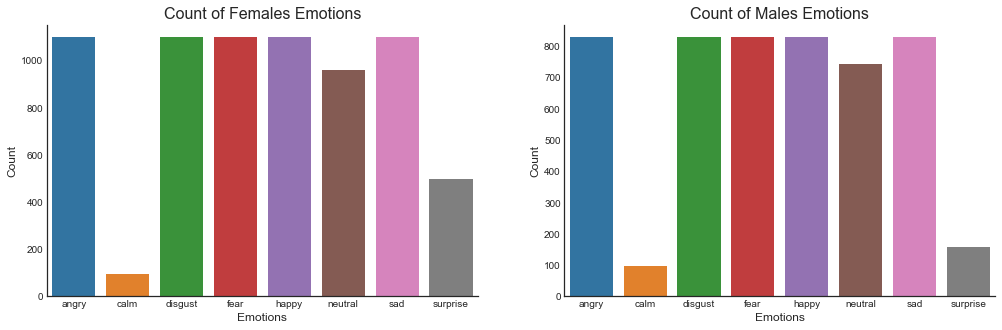

In [15]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [16]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

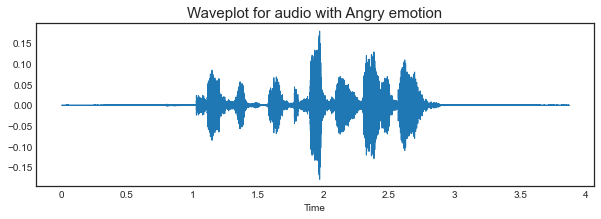

In [17]:
emotion='Angry'
path = RAV+'Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

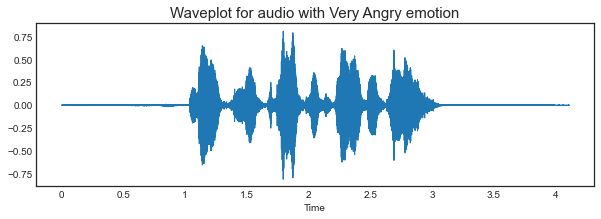

In [18]:
emotion='Very Angry' 
path = RAV+'/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

In [19]:
"""emotion='Sing Angry'
path = RAV+'/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)
"""

"emotion='Sing Angry'\npath = RAV+'/Actor_01/03-02-05-01-01-01-01.wav'\ndata, sampling_rate = librosa.load(path)\ncreate_waveplot(data, sampling_rate, emotion)\nAudio(path)\n"

In [20]:
"""emotion='Sing Very Angry' 
path = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)
"""

"emotion='Sing Very Angry' \npath = '../input/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'\ndata, sampling_rate = librosa.load(path)\ncreate_waveplot(data, sampling_rate, emotion)\nAudio(path)\n"

## Adding augmentation

#### Definition:
* Data augmentation is the process by which we create new synthetic training samples by adding small perturbations on our initial training set.
* The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
* In order to this to work adding the perturbations must conserve the same label as the original training sample.
* In images data augmention can be performed by shifting the image, zooming, rotating ...
* In our case we will add noise, stretch and roll, pitch shift ...

In [21]:
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

# taking any example and checking for techniques.
path = path = RAV+'/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

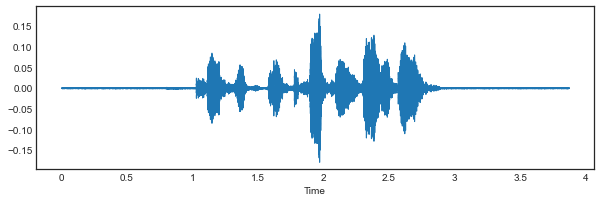

In [22]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-21-ecc89528e0f5>:7: FutureWarning: Pass rate=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


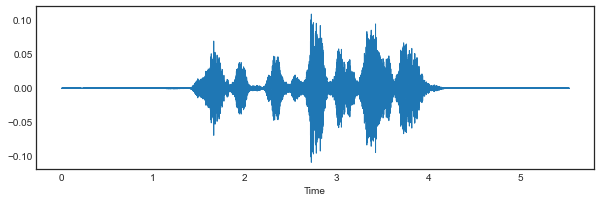

In [23]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

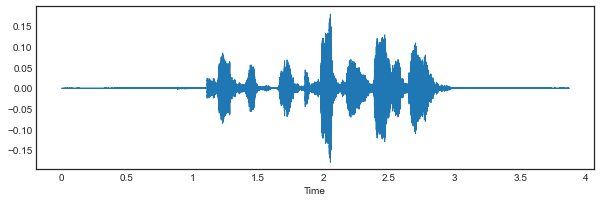

In [24]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-21-ecc89528e0f5>:14: FutureWarning: Pass sr=22050, n_steps=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


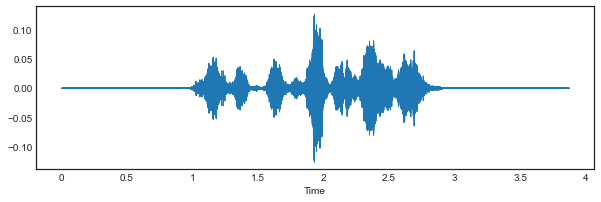

In [25]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-21-ecc89528e0f5>:17: FutureWarning: Pass rate=1.25 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


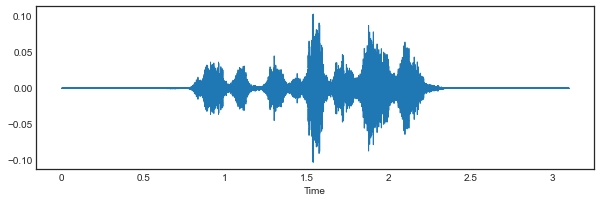

In [26]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

<ipython-input-21-ecc89528e0f5>:20: FutureWarning: Pass rate=0.75 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, speed_factor)


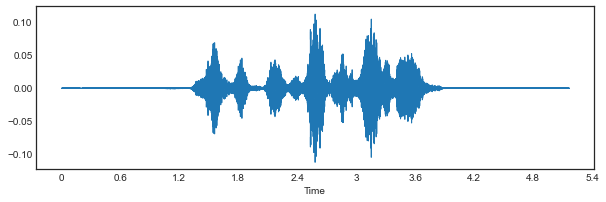

In [27]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# <center> Feature Extraction</center>

## Mel-Frequency Cepstral Coefficients (MFCCs)


In [28]:
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    """
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    """
    return result

In [29]:
if not DATA_FRAMES:    #if not dataframes
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)
    

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

Check shapes:
Female features: 14064, labels: 14064
Male features:   10260, labels: 10260


In [30]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [31]:
if not DATA_FRAMES:    #not
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

Female dataframe


In [32]:
if not DATA_FRAMES:   #not
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

Male dataframe


In [6]:
import pandas as pd
Females_Features = pd.read_csv(fem_path)
Males_Features = pd.read_csv(mal_path)
Males_Features

FileNotFoundError: [Errno 2] No such file or directory: 'D:/thesis_codes/3_full_datasets_1dCNN/Female_features.csv'

# <center>Data Preparation


In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [35]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [36]:
female_Y

array(['angry', 'angry', 'angry', ..., 'neutral', 'sad', 'sad'],
      dtype=object)

In [37]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

In [38]:
female_Y.shape

(14064, 8)

In [39]:
male_Y[4520]

array([1., 0., 0., 0., 0., 0., 0., 0.])

## Splitting data

In [40]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((19459, 58), (19459, 8), (4865, 58), (4865, 8))

In [41]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((11251, 58), (11251, 8), (2813, 58), (2813, 8))

In [42]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((8208, 58), (8208, 8), (2052, 58), (2052, 8))

In [43]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

## Making our data compatible to model

In [44]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((19459, 58, 1), (19459, 8), (4865, 58, 1), (4865, 8))

In [45]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((11251, 58, 1), (11251, 8), (2813, 58, 1), (2813, 8))

In [46]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((8208, 58, 1), (8208, 8), (2052, 58, 1), (2052, 8))

# <center>Modeling<center>

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [48]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [49]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [50]:
with strategy.scope():
    
    def build_model(in_shape):
        
        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))
        
        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
          
        
        return model

In [51]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()
    
    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]
    
    return model

In [52]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 32
n_epochs = 75

In [53]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

## Model Summary and Pre-training Accuracy

In [54]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1792      
                                                                 
 average_pooling1d (AverageP  (None, 29, 256)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_1 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_2 (Averag  (None, 8, 128)           0

In [55]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_3 (Averag  (None, 29, 256)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_5 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_4 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_6 (Conv1D)           (None, 15, 128)           98432     
                                                                 
 average_pooling1d_5 (Averag  (None, 8, 128)          

In [56]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 58, 256)           1792      
                                                                 
 average_pooling1d_6 (Averag  (None, 29, 256)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_9 (Conv1D)           (None, 29, 128)           196736    
                                                                 
 average_pooling1d_7 (Averag  (None, 15, 128)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_10 (Conv1D)          (None, 15, 128)           98432     
                                                                 
 average_pooling1d_8 (Averag  (None, 8, 128)          

## Model training

In [57]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/75
609/609 [==============================] - 9s 13ms/step - loss: 1.7063 - accuracy: 0.3153 - val_loss: 1.4441 - val_accuracy: 0.4508 - lr: 0.0010
Epoch 2/75
609/609 [==============================] - 7s 12ms/step - loss: 1.4227 - accuracy: 0.4333 - val_loss: 1.2924 - val_accuracy: 0.4787 - lr: 0.0010
Epoch 3/75
609/609 [==============================] - 7s 12ms/step - loss: 1.3279 - accuracy: 0.4677 - val_loss: 1.2136 - val_accuracy: 0.5145 - lr: 0.0010
Epoch 4/75
609/609 [==============================] - 7s 12ms/step - loss: 1.2663 - accuracy: 0.4933 - val_loss: 1.1721 - val_accuracy: 0.5336 - lr: 0.0010
Epoch 5/75
609/609 [==============================] - 7s 12ms/step - loss: 1.2234 - accuracy: 0.5087 - val_loss: 1.1304 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 6/75
609/609 [==============================] - 8s 13ms/step - loss: 1.1823 - accuracy: 0.5261 - val_loss: 1.1446 - val_accuracy: 0.5511 - lr: 0.0010
Epoch 7/75
609/609 [==============================] - 8s 13ms/st

In [58]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

Epoch 1/75
352/352 [==============================] - 5s 13ms/step - loss: 1.5826 - accuracy: 0.3613 - val_loss: 1.2238 - val_accuracy: 0.5215 - lr: 0.0010
Epoch 2/75
352/352 [==============================] - 4s 12ms/step - loss: 1.2236 - accuracy: 0.5223 - val_loss: 1.0534 - val_accuracy: 0.5883 - lr: 0.0010
Epoch 3/75
352/352 [==============================] - 4s 12ms/step - loss: 1.0926 - accuracy: 0.5667 - val_loss: 0.9773 - val_accuracy: 0.6075 - lr: 0.0010
Epoch 4/75
352/352 [==============================] - 4s 12ms/step - loss: 1.0333 - accuracy: 0.5875 - val_loss: 0.9684 - val_accuracy: 0.6008 - lr: 0.0010
Epoch 5/75
352/352 [==============================] - 4s 12ms/step - loss: 0.9947 - accuracy: 0.6038 - val_loss: 0.9115 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 6/75
352/352 [==============================] - 4s 12ms/step - loss: 0.9641 - accuracy: 0.6157 - val_loss: 0.9032 - val_accuracy: 0.6534 - lr: 0.0010
Epoch 7/75
352/352 [==============================] - 4s 12ms/st

In [59]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

Epoch 1/75
257/257 [==============================] - 4s 14ms/step - loss: 1.8422 - accuracy: 0.2431 - val_loss: 1.6987 - val_accuracy: 0.3017 - lr: 0.0010
Epoch 2/75
257/257 [==============================] - 3s 12ms/step - loss: 1.6978 - accuracy: 0.3013 - val_loss: 1.5833 - val_accuracy: 0.3582 - lr: 0.0010
Epoch 3/75
257/257 [==============================] - 3s 12ms/step - loss: 1.6163 - accuracy: 0.3330 - val_loss: 1.4932 - val_accuracy: 0.4020 - lr: 0.0010
Epoch 4/75
257/257 [==============================] - 3s 12ms/step - loss: 1.5635 - accuracy: 0.3643 - val_loss: 1.4820 - val_accuracy: 0.4094 - lr: 0.0010
Epoch 5/75
257/257 [==============================] - 3s 12ms/step - loss: 1.5367 - accuracy: 0.3779 - val_loss: 1.4404 - val_accuracy: 0.4250 - lr: 0.0010
Epoch 6/75
257/257 [==============================] - 3s 12ms/step - loss: 1.5129 - accuracy: 0.3879 - val_loss: 1.4116 - val_accuracy: 0.4371 - lr: 0.0010
Epoch 7/75
257/257 [==============================] - 3s 12ms/st

**Uncomment the code below to see the output of a specific layer

In [ ]:
'''
from keras import backend as K

layer_name = 'conv1d_11'
intermediate_layer_model = keras.Model(inputs=female_model.input,
                                       outputs=female_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_testF)
print(intermediate_output[1,0])
'''

## Performance Evaluations

In [60]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 94.15%
Mixed-gender emotions testing Accuracy: 65.98%


In [61]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 97.74%
Female emotions testing Accuracy: 77.60%


In [62]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 95.77%
Male emotions testing Accuracy: 62.23%


## Training and Validation trends

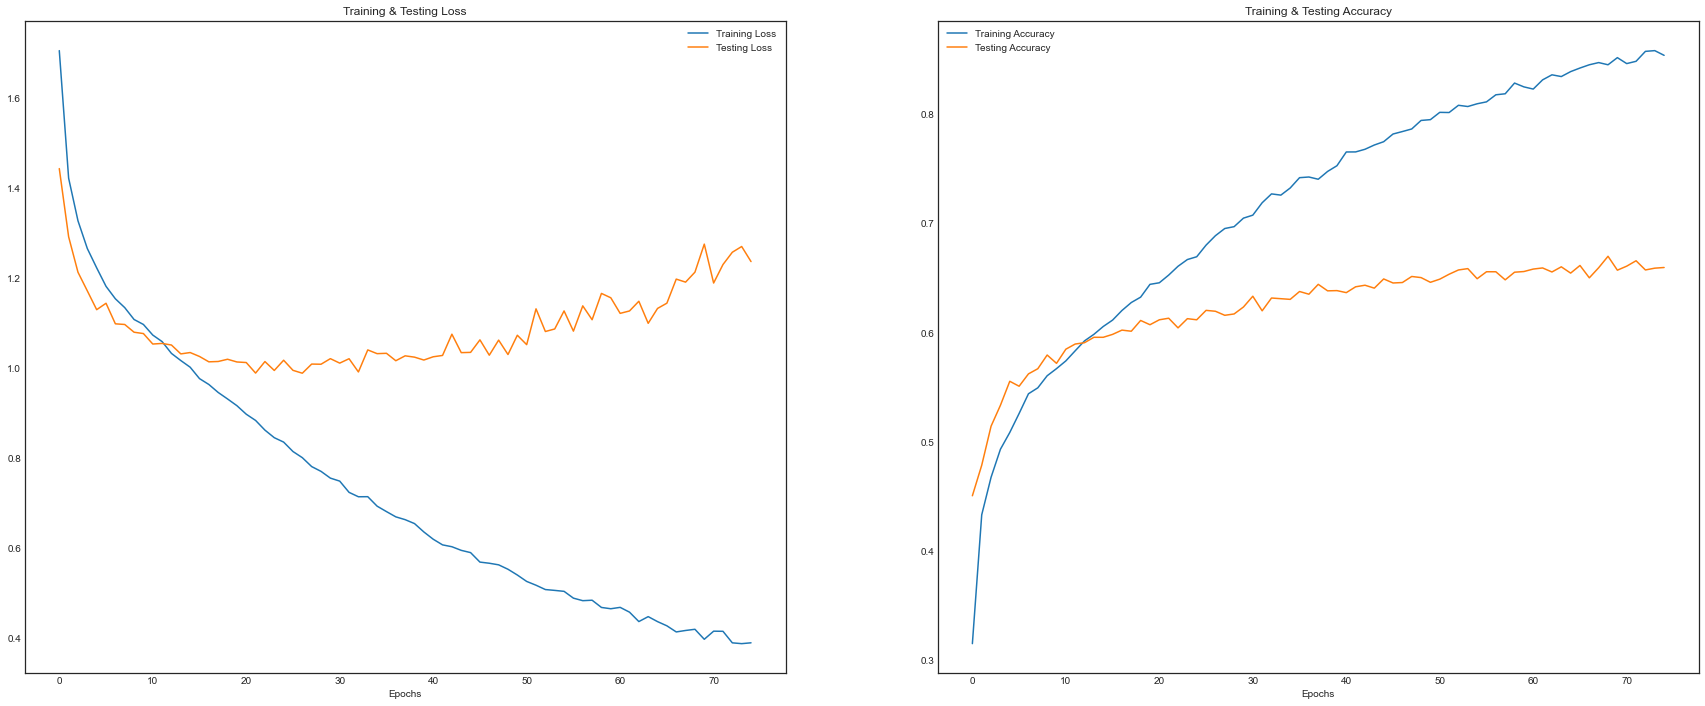

In [63]:
show_graphs(history)

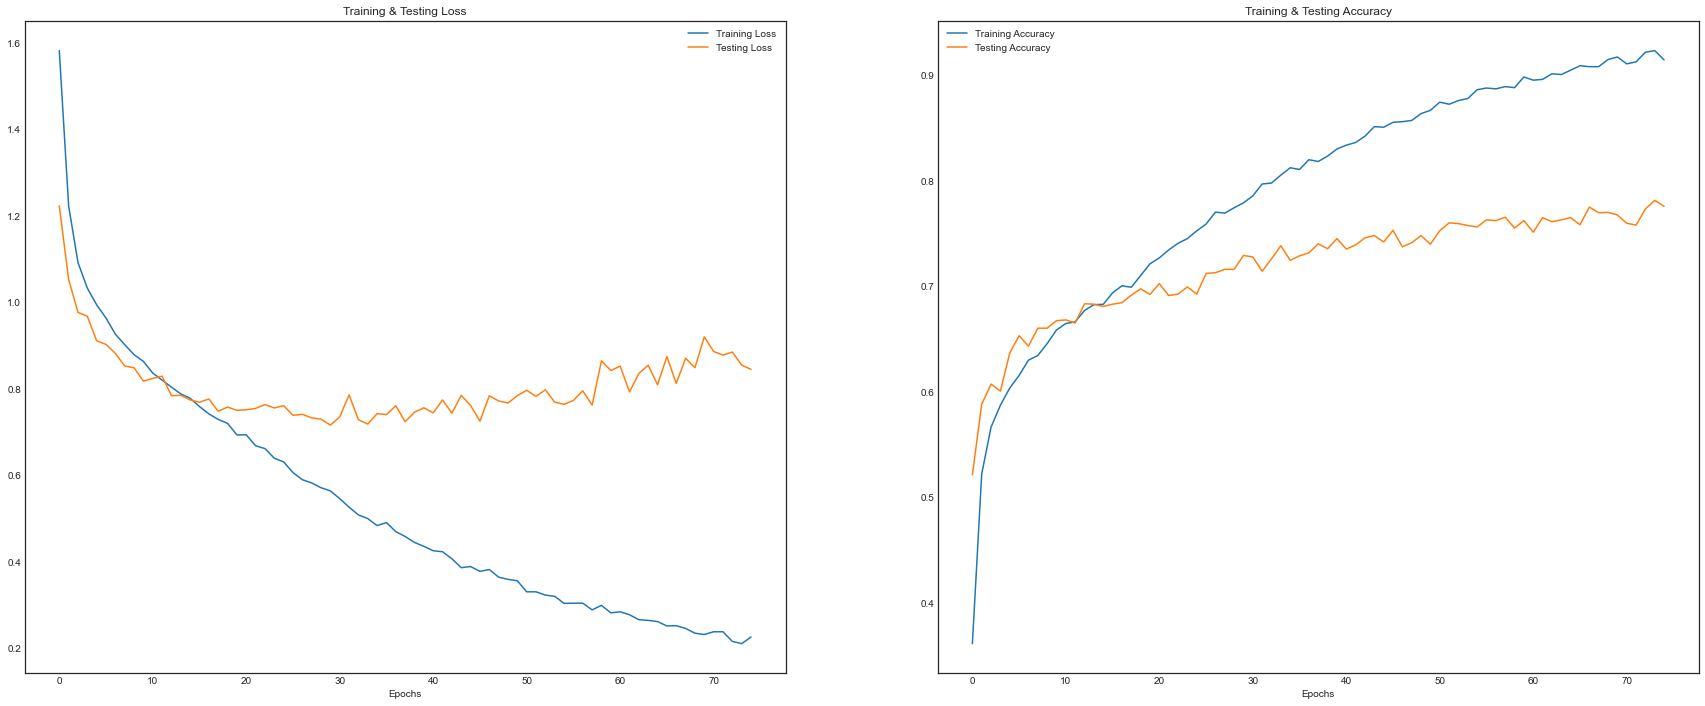

In [64]:
show_graphs(female_history)

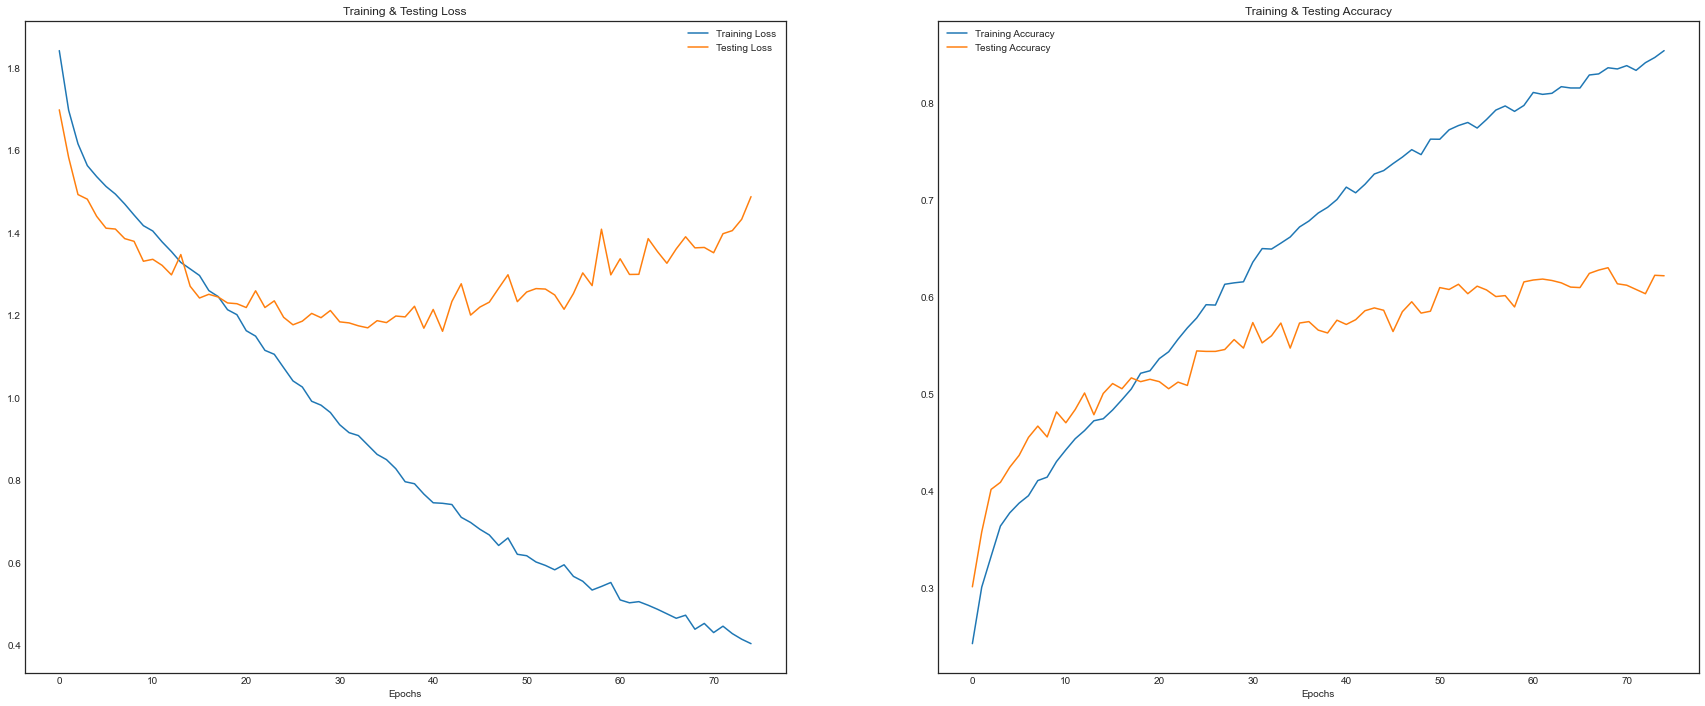

In [65]:
show_graphs(male_history)

## Confusion matrix

In [2]:
from keras.models import load_model
model = load_model("cnn_AQ_aug.h5")


loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

NameError: name 'x_test' is not defined

In [66]:
# predicting on test data.
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

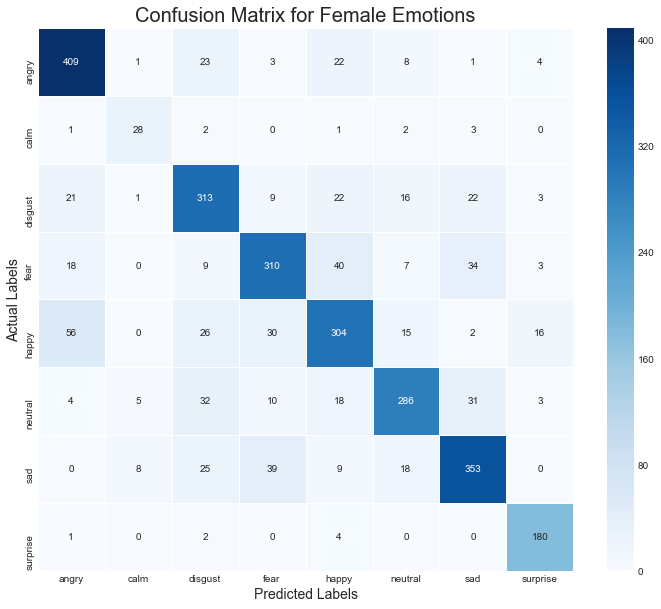

In [67]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [68]:
# predicting on test data.
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

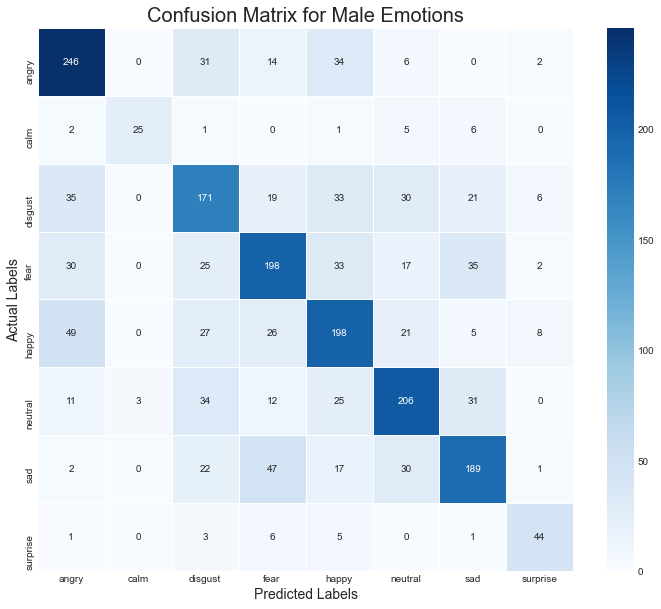

In [69]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()